## R graphics

In [ ]:
#I faced troubles by showing the characters of the plots
#and it solved it https://stackoverflow.com/questions/64463834/text-does-not-show-properly-in-r-plot
#install.packages("showtext")
library(showtext)
showtext_auto()

### Saving in R

<span style="color:blue">Saving R objects</span>

- sometimes we need to save objects created in R
- to save the current R session, so that it can be loaded at a later stage to continue working on it:

    <span style="color:blue">save(list = ls(all=TRUE), file = "my-session"</span>
    
- a binary file will be produced and saved on disk
- everything can be loaded, at a later stage, with the following command:

    <span style="color:blue">load(file = "my-session")</span>
    
<span style="color:blue">Saving R history</span>

- sometimes we need to save only the lines of code that have been typed in an R session

    <span style="color:blue">savehistory( file= "my-history.R</span>
    
- a text file with all the command is saved on disk
- to retrieve history, type:
    
    <span style="color:blue">loadhistory(file = "my-history.R</span>

<span style="color:blue">Saving graphics</span>

- graphics can be saved in either pdf or postscript to include in a report
- the procedure is to open a new pdf or postscript device, with the pdf() or postscript() functions
- then all commands needed to create the graphics can be typed in the R session, and once finished, the device has to be closed with the dev.off() function.

In [2]:
pdf("PLOTS/my-plot.pdf")
hist(rnorm(10000))
dev.off()
showtext_auto()

png 
  2

<span style="color:blue"> Saving data produced within R</span>

- let's suppose we have produced a vector we want to save on disk


In [13]:
nbnumbers <- rnbinom(1000, size=1, mu=1.2)

- and we want to save them in a file, in a single column

In [14]:
write(nbnumbers, "DATA/nbnumbers.txt",1)

- if, instead, we want to save them in a matrix like format

In [15]:
xmat <- matrix(rpois(10000,0.75), nrow=1000)
write.table(xmat, "DATA/table.txt", col.names=F,row.names=F)

- we have saved 1000 rows each of 100 Poisson random numbers with $\lambda =0.75$

### R graphics system

<span style="color:blue">base</span> graphics

- a pen on paper model: you can only draw on top of a plot, no modification or deletion of existing content possible
- no user accessible representation of a graphics, only appearance on the screen
- fast primitives, but with limited scope


<span style="color:blue">grid</span> graphics

- developed by Paul Murrell
- graphical objects can be represented independently of the plot and modified later
- a system of viewports makes it easier to lay out complex graphics

<span style="color:blue">lattice</span> graphics

- developed by Deepayan Sakar
- use grid graphics to implement the trellis graphics system of Cleveland

<span style="color:blue">ggplot2</span> 

- a data visualization package created by Hadley Wickham
- it implements L. Wikinson's Grammar Graphics: a general scheme for data visualization which breaks up graphs into semantic components such as scales and layers

### The R <span style="color:blue">boxplot( )</span> function

- is a one-dimensional plot, known as the <span style="color:blue">box-and-whisker plot</span>
- may be displayed vertically or horizontally
- the boxplot is always based on three quantities: <span style="color:blue">top and bottom of the bow</span> are <span style="color:blue">determined by</span> the <span style="color:blue">upper and lower quantiles</span>; the band inside the box is the median
- the whiskers are created according to the purpose of the analyses ad defined by the experimenter

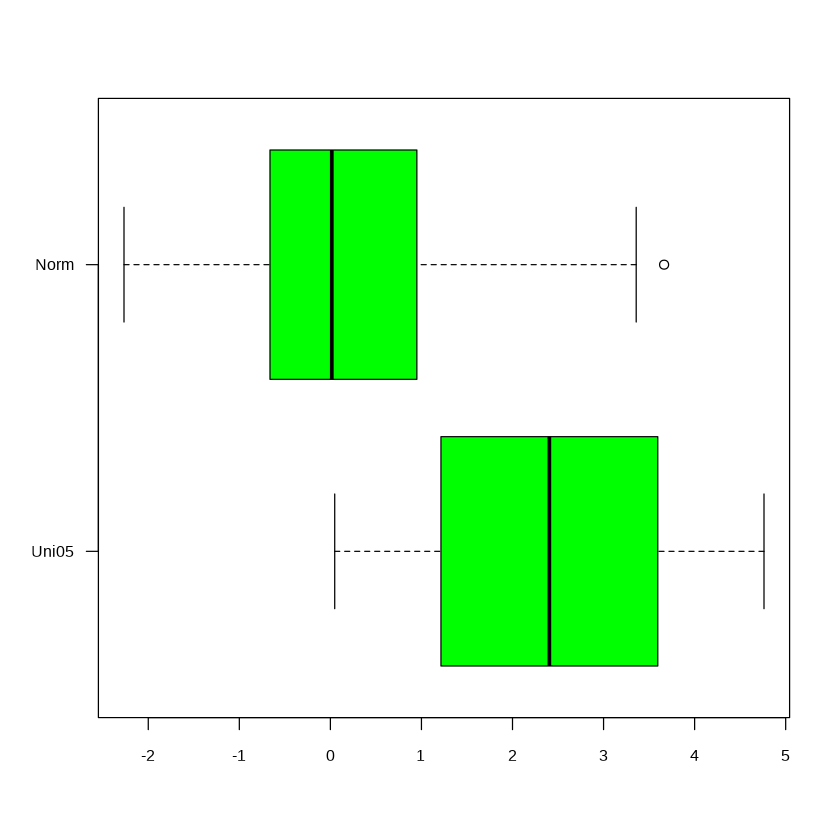

In [19]:
mat <- cbind(Uni05 = (1:100)/21,
             Norm = rnorm(100))
df1 <- as.data.frame(mat)
par(las =1)
boxplot(df1, horizontal=TRUE,col   ="green")

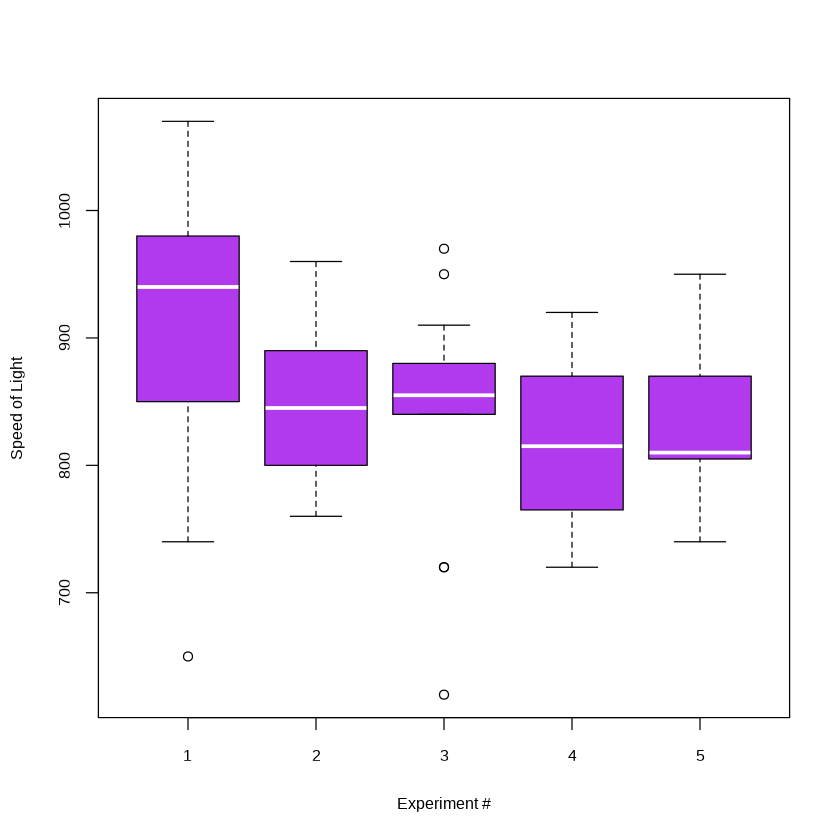

In [18]:
boxplot( Speed ~ Expt,
       data  = morley,
       xlab  ="Experiment #",
       ylab  ="Speed of Light",
       col   ="darkorchid2",
       medcol="white" )

### The R <span style="color:blue">hist( )</span> function

- an histogram object has a complex structure
- its data can be accessed using the <span style="color:blue"> \$ + name</span> syntax; as example, <span style="color:blue">hm\$breaks</span> is a vector with the bin limits

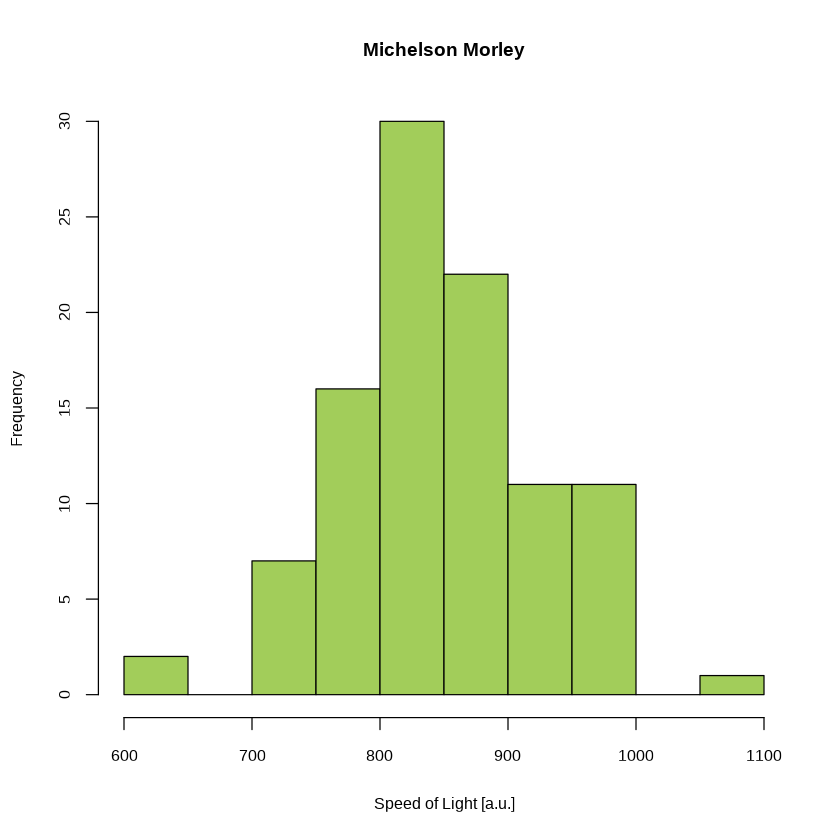

In [22]:
hm <- hist(morley[,3], col="darkolivegreen3",
          xlab="Speed of Light [a.u.]", main="Michelson Morley")

In [23]:
str(hm)

List of 6
 $ breaks  : int [1:11] 600 650 700 750 800 850 900 950 1000 1050 ...
 $ counts  : int [1:10] 2 0 7 16 30 22 11 11 0 1
 $ density : num [1:10] 0.0004 0 0.0014 0.0032 0.006 0.0044 0.0022 0.0022 0 0.0002
 $ mids    : num [1:10] 625 675 725 775 825 ...
 $ xname   : chr "morley[, 3]"
 $ equidist: logi TRUE
 - attr(*, "class")= chr "histogram"


#### function main parameters

- hist(v, main, xlab, xlim, ylim, breaks, col, border)

- <span style="color:blue">v</span> a vector with numeric values used in histogram
- <span style="color:blue">main</span> indicates title of the chart
- <span style="color:blue">col</span> is used to set color of the bars
- <span style="color:blue">border</span> is used to set border color of each bar
- <span style="color:blue">xlab</span> is used to to give description of x-axis
- <span style="color:blue">xlim</span> specifies the range of values on the x-axis
- <span style="color:blue">ylim</span> specifies the range of values on the y-axis
- <span style="color:blue">breaks</span> is used to mention the width of each bar
- <span style="color:blue">frame = FALSE</span> removes the box around the plot

### Superimposing histograms

- the <span style="color:blue">add = TRUE</span> histogram parameters will do the job
- the option <span style="color:blue">freq = TRUE</span> will ensure that, in case of non equal number of observations, the heights of an interval remain the same

In [2]:
morley[[3]][morley$Exp==1]

[1]  850  740  900 1070  930  850  950  980  980  880 1000  980  930  650  760
[16]  810 1000 1000  960  960

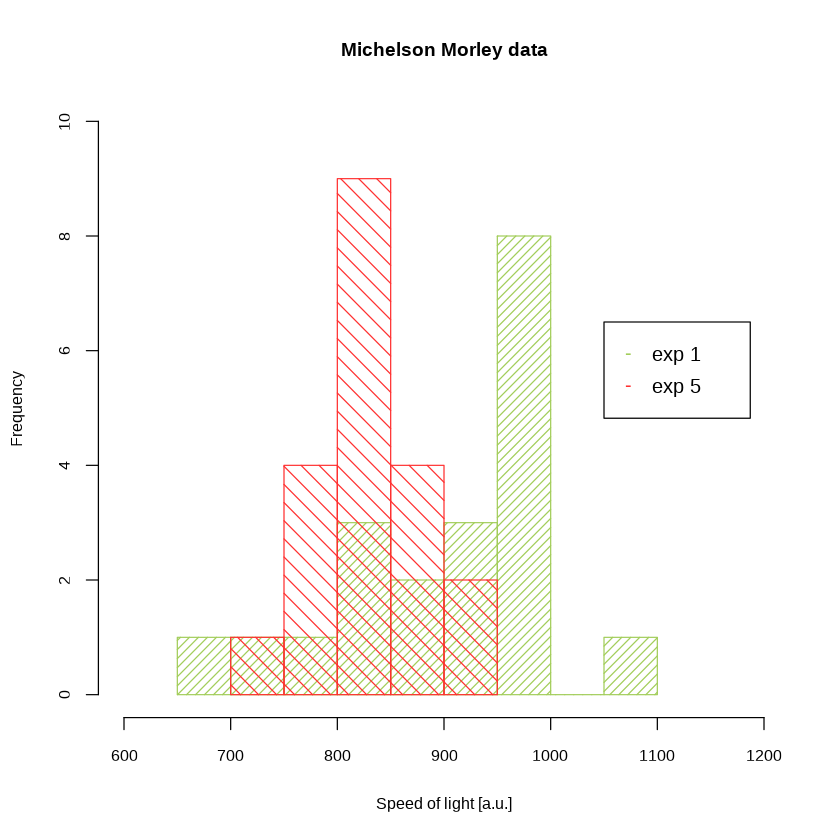

In [30]:
exp_1 <- morley[[3]][morley$Exp==1]
exp_5 <- morley[[3]][morley$Exp==5]

hist(exp_1, col="darkolivegreen3",
            density =20, freq=TRUE,
            xlim =c(600,1200),
            ylim =c(0,10),
    xlab="Speed of light [a.u.]",
    main="Michelson Morley data")

hist(exp_5, col="firebrick1",
    density =10, freq=TRUE,
    angle=-45,
    add=TRUE)

legend(x=1050,y=6.5,
      c("exp 1", "exp 5"),
      col=c("darkolivegreen3",
           "firebrick1"),
      pch="-",cex=1.25)

### More plots in one page

- through <span style="color:blue">par()</span> it is possible to query or specify graphical parameters
- we divide the plot area in 2-row, 3-columns
- but since we have only 5 histograms, this leaves an empty plot area
    
    CheatSheet <span style="color:blue">https://raw.githubusercontent.com/rstudio/cheatsheets/master/how-big-is-your-graph.pdf</span>

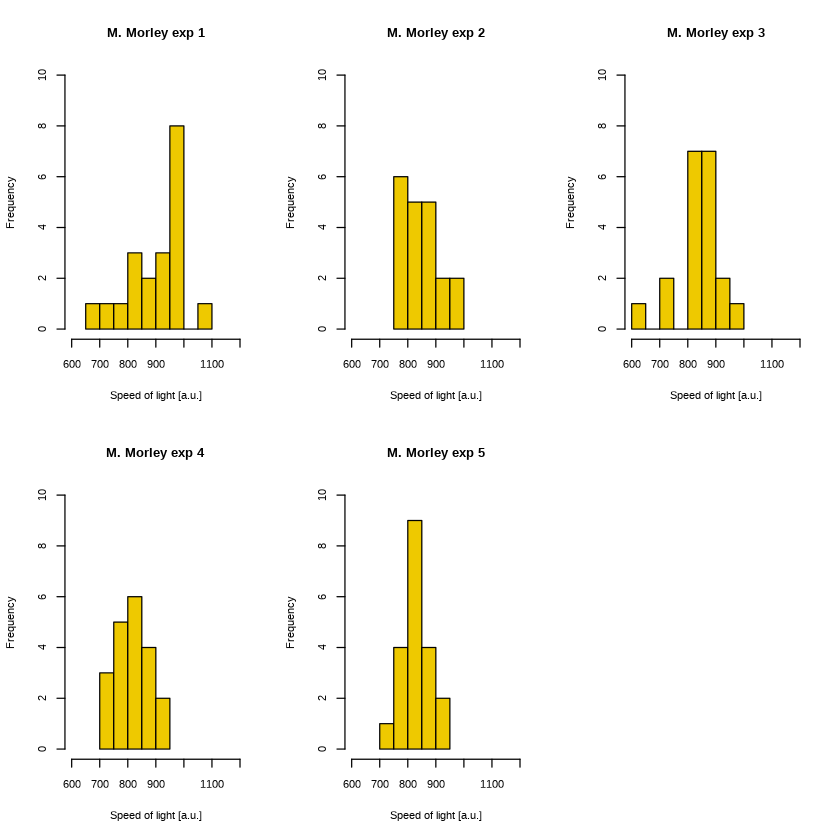

In [32]:
# Save the old par versions

old_par <- par()

#Divide the graphical area in 
# 2 rows, 3 columns

par(mfrow=c(2,3))

for (n_exp in 1:5) {
    h_text <- paste("M. Morley exp",
                   n_exp, sep=" ")
    hist(morley[morley$Exp==n_exp,3],
        col="gold2",
        xlim=c(600,1200),
        ylim=c(0,10),
        xlab="Speed of light [a.u.]",
        main=h_text)
}

#### layout()

- the <span style="color:blue">layout(mat)</span> function divides the device up into as many rows and columns as there are in matrix "mat"
- a value of 0 says that such parts should not be used for plots

In [36]:
# Divide the area. 2 rows 6 columns

p_area <- matrix(c(1,1,2,2,3,3,
                  0,4,4,5,5,0),
                nrow = 2, ncol = 6,
                byrow =TRUE)

p_area

1,1,2,2,3,3
0,4,4,5,5,0


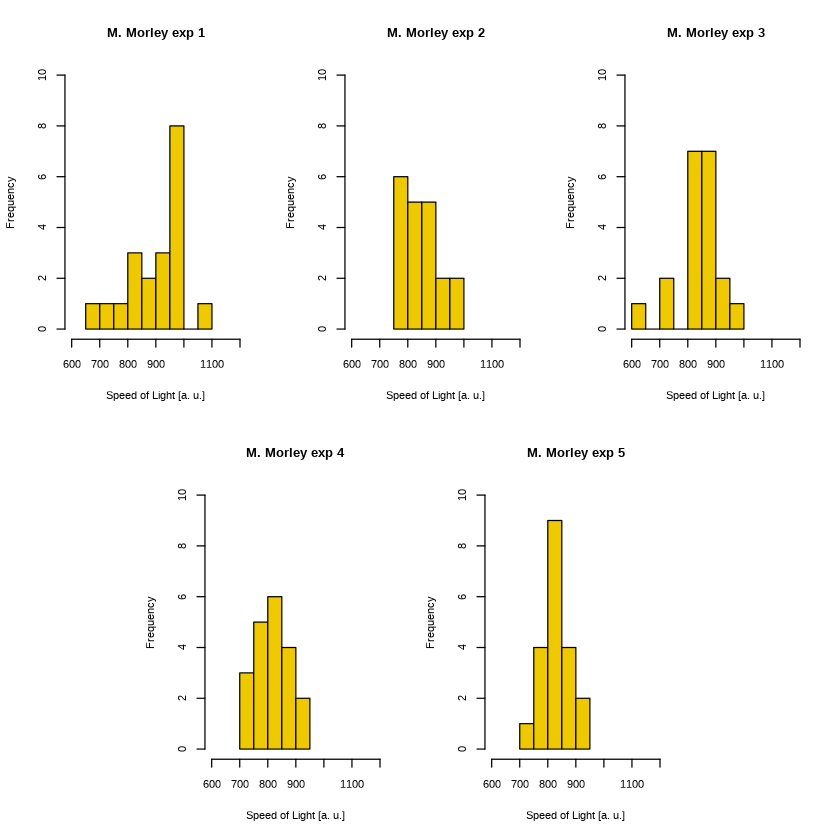

In [37]:
layout(p_area)

for (n_exp in 1:5) {
    h_text <- paste("M. Morley exp",
                   n_exp, sep =" ")
    hist(morley[morley$Exp==n_exp,3],
         col  ="gold2",
         xlim =c(600,1200),
        ylim  =c(0,10),
        xlab  ="Speed of Light [a. u.]",
        main  = h_text)
}

### The R scatter plot( ) function

- the <span style="color:blue">plot()</span> function allows to produce a scatter plot of one variable versus the other
- the <span style="color:blue">asp = value</span> parameter allows to keep the y/x aspect ratio to a fixed value
- <span style="color:blue">asp=1</span> sets the same scale for both x and y axis, even if the plot window is re-scaled

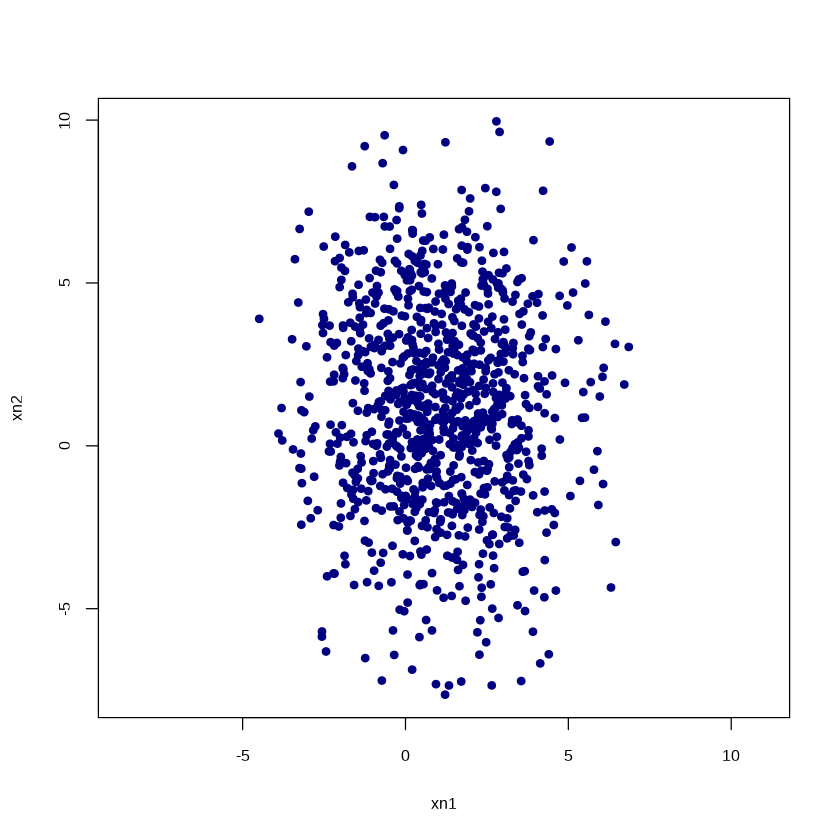

In [38]:
set.seed(34761542)
xn1 <- rnorm(1000, 1, 2)
xn2 <- rnorm(1000, 1, 3)
plot(xn1, xn2, pch =20,
    col ="navy", cex=1.25,
    asp =1)

- it is possible to <span style="color:blue">use a third variable for a color</span>

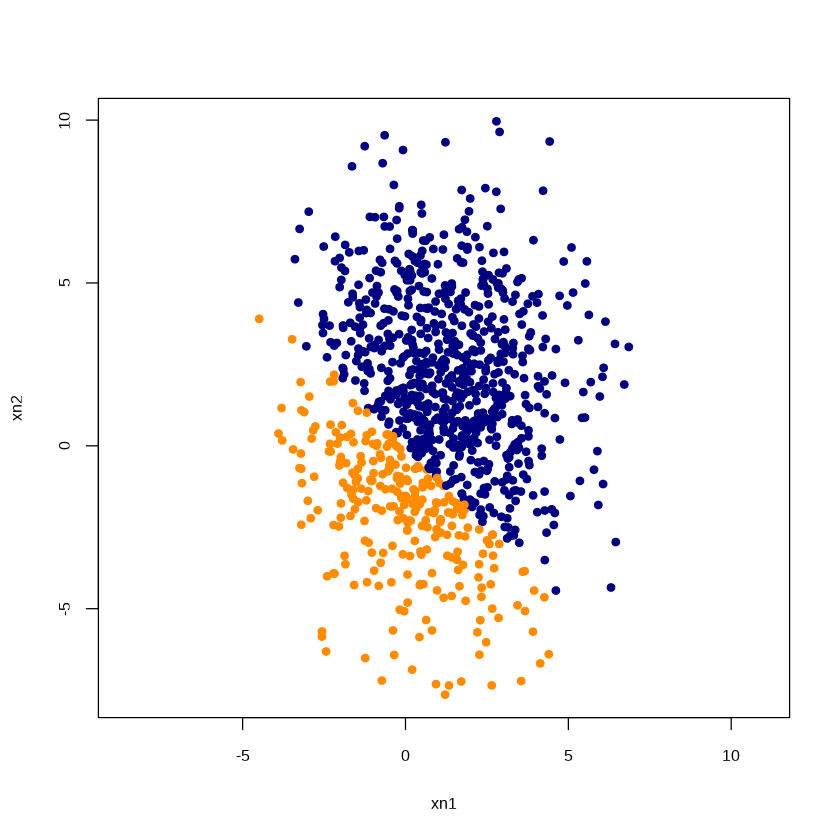

In [39]:
xcontrol <- jitter(xn1+xn2, 2)
plot(xn1, xn2, pch =20, cex =1.25,
    col = ifelse(xcontrol >0,
                "navy", "darkorange"),
    asp =1)

### Color for symbols and axes

- with the parameter <span style="color:blue">pch</span> it is possible to specify the plotting symbols
- moreover, it is possible to set the background <span style="color:blue">bg</span>, and fill Colors <span style="color:blue">col</span>, separately
- the option <span style="color:blue">freq =TRUE</span> will ensure that, in case of non equal number of observations, the heights of an interval remain the same

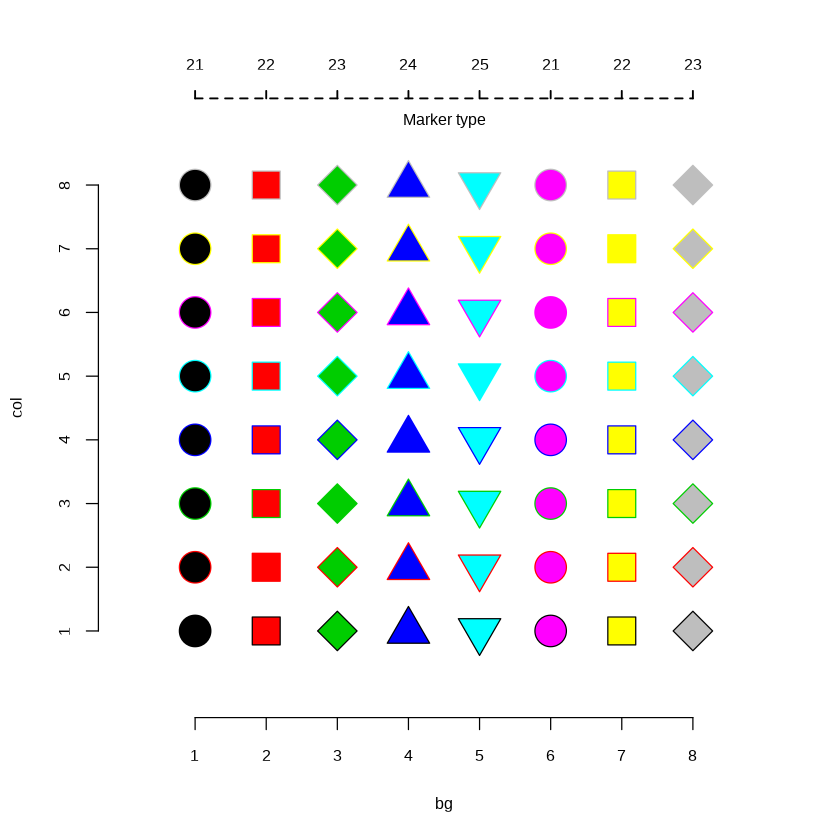

In [41]:
plot(0:9, 0:9,
    type="n", axes =FALSE,
    ylab ="col",xlab ="bg")
for (i in 1:8) {
    points(1:8, rep(i,8),
          pch=c(21,22,23,24,25),
          bg=1:8, col=i, cex=3.5)
}
axis(1, at=1:8)
axis(2, at=1:8)
axis(3, at=1:8,
    c(21,22,23,24,25,21,22,23),
    lty=2, lwd=1.5)
text(4.5,9,"Marker type")

### Joining points with lines( )

- the primitive <span style="color:blue">lines()</span> allows to connect points with lines
- the line go across the points

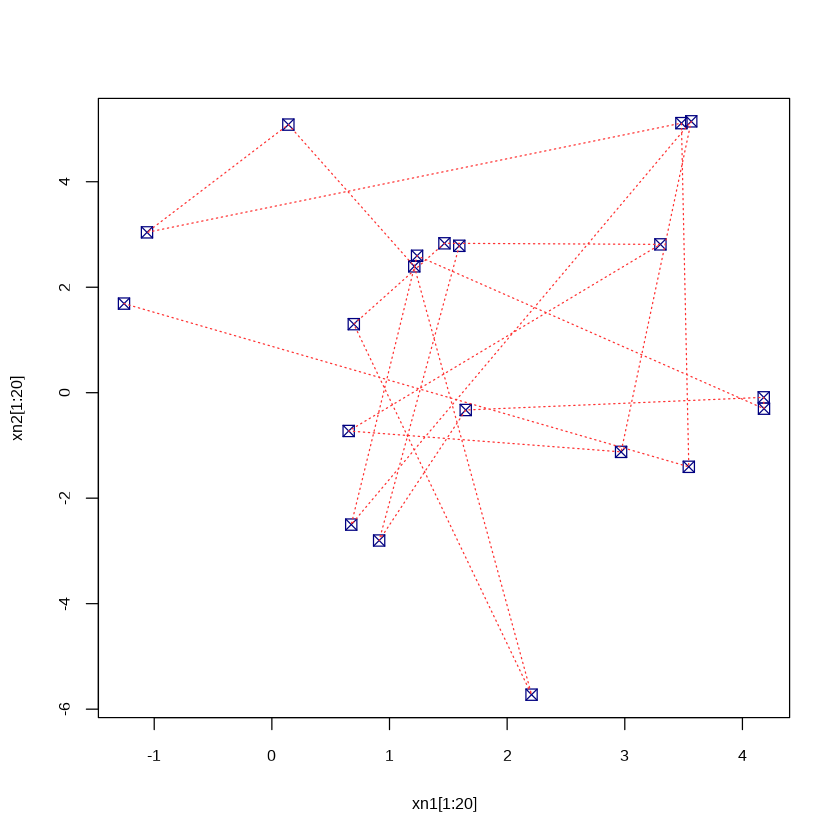

In [42]:
plot(xn1[1:20], xn2[1:20],
    pch = 7, cex=1.25, col="navy")

lines(xn1[1:20], xn2[1:20],
     col = "firebrick1", lty=3)

- with option <span style="color:blue">type='s'</span>, a stepped line going across first and then up (or down)
- with option <span style="color:blue">type ='S'</span>, a stepped line goes first up (or down) and then across

In [46]:
x <-c(-2,1,2,4,5,7,9)
y <-c(2,1,2,2,-2,7,8)

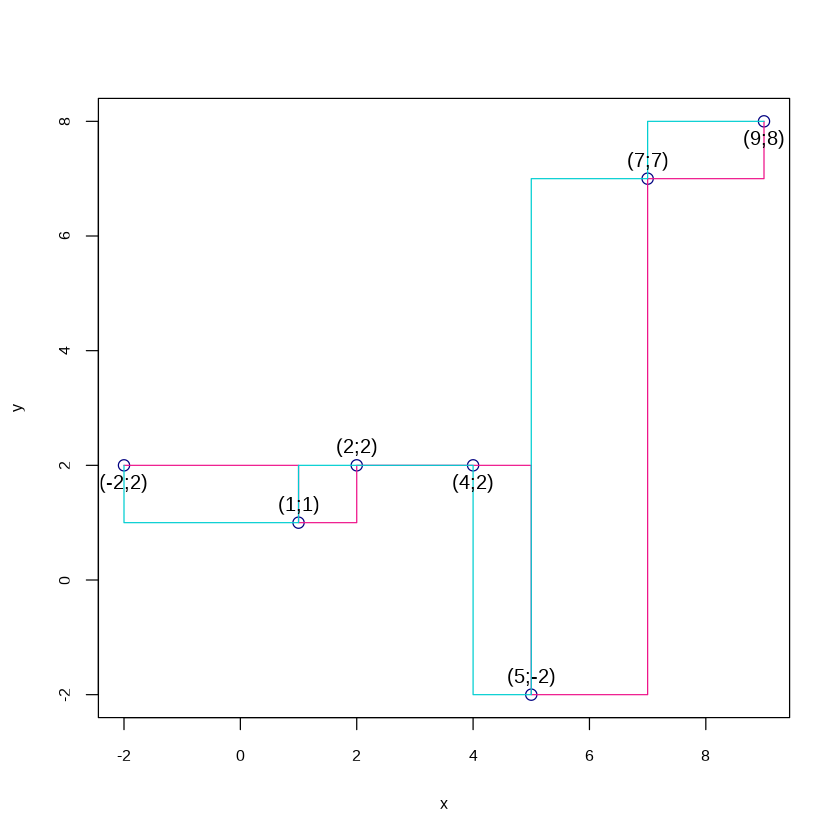

In [53]:
plot(x, y,
     cex=1.25, col="navy")

lines(x,y,col="deeppink2", type="s")
lines(x,y,col="darkturquoise", type="S")
tpos <- c(1,3,3,1,3,3,1)
text(x,y,
    labels=paste("(",x,";",y,")", sep=""),
     pos=tpos, offset=0.5, cex=1.25)

### Plotting curves

- <span style="color:blue">curve()</span> allows to plot an analytical function
- <span style="color:blue">abline()</span> draws a line, given the intercept and the slope

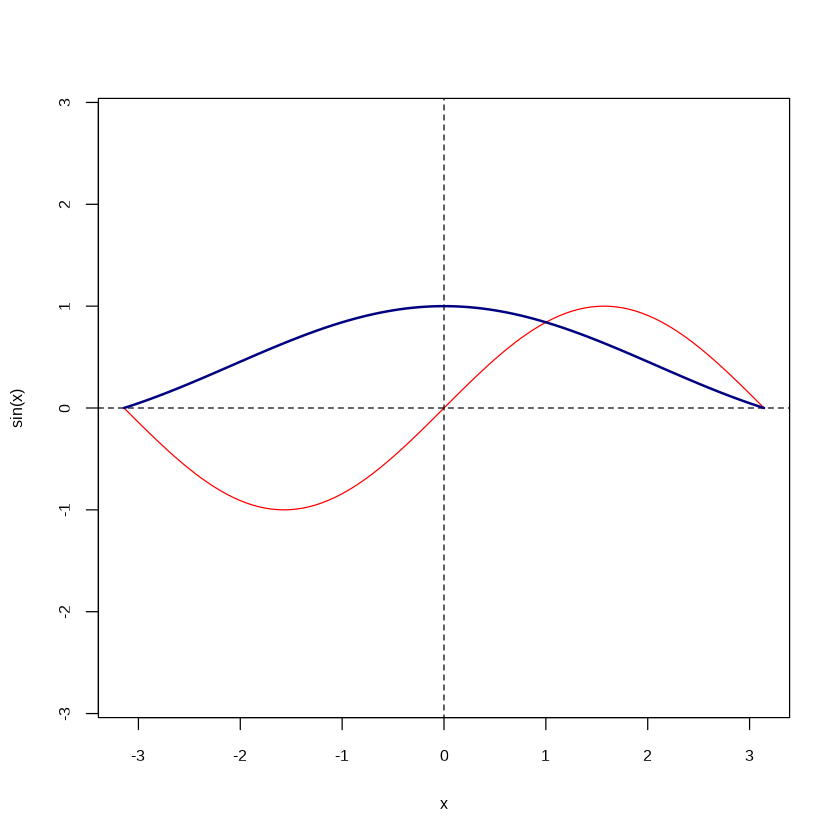

In [61]:
curve(sin(x),-pi,pi,col="red",asp=1)

abline(0,0,lty=2)
abline(0,10000,lty=2)

curve(sin(x)/x,-pi,pi,col="navy",
     lw=2,add=T)

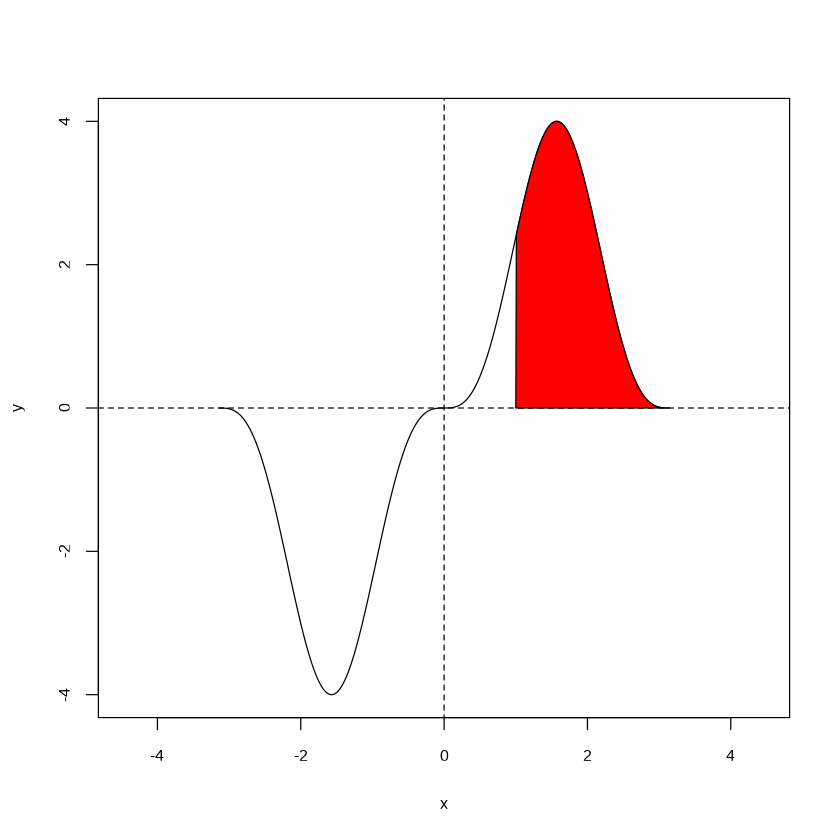

In [69]:
x <- seq(-pi,pi,0.01)
y <- 4 * sin(x)^3
plot(x,y,type="l",asp=1)

polygon( c(1,x[x>=1]),
         c(0,y[x>1]), col="red", angle=10)

abline(0,0,lty=2)
abline(0,10000,lty=2)

### barplot

- a barplot shows the relationship between a numeric variable and a categorical variable
- R creates a barplot with vertical or horizontal bars
- be careful: <span style="color:red">s barplot is not an histogram</span>

In [4]:
VADeaths

,Rural Male,Rural Female,Urban Male,Urban Female
50-54,11.7,8.7,15.4,8.4
55-59,18.1,11.7,24.3,13.6
60-64,26.9,20.3,37.0,19.3
65-69,41.0,30.9,54.6,35.1
70-74,66.0,54.3,71.1,50.0


,Rural Male,Rural Female,Urban Male,Urban Female
50-54,11.7,8.7,15.4,8.4
55-59,18.1,11.7,24.3,13.6
60-64,26.9,20.3,37.0,19.3
65-69,41.0,30.9,54.6,35.1
70-74,66.0,54.3,71.1,50.0


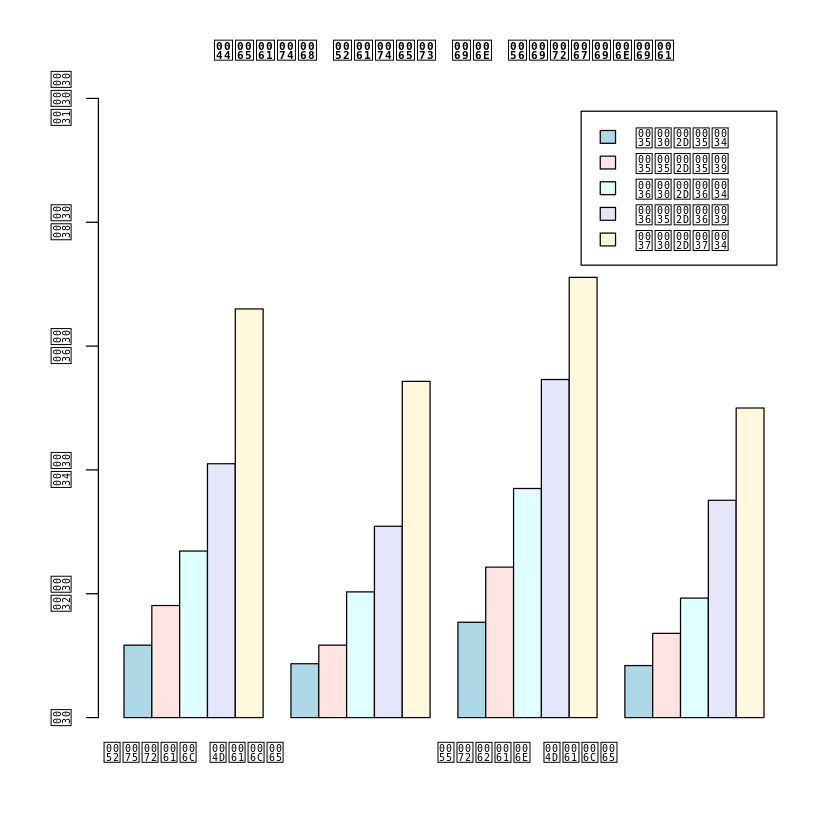

In [3]:
barplot(VADeaths, beside =TRUE,
       col = c("lightblue",
               "mistyrose", "lightcyan",
               "lavender", "cornsilk"),
       legend = rownames(VADeaths),
       ylim = c(0,100))
title(main = "Death Rates in Virginia")

VADeaths

### The grammar of graphics 

- created by Wilkinson in 2005 to describe the features living behind all statistical graphics
- it has the following components:

    - <span style="color:blue">layer</span>: are used to create objects on a plot. They are defined by five basic parts:
        - <span style="color:blue">data</span> (the source of the information to be visualized.
        - <span style="color:blue">mapping</span> (how variables are applied to the plot)
        - <span style="color:blue">statistical transformation</span> (which transform the data by summarizing the information)
        - <span style="color:blue">geometric objects</span> (controls the type of the plot to be created
        -<span style="color:blue">position adjustment</span>
        
    - <span style="color:blue">scale</span>: controls how data is mapped to the aesthetic attributes (ex:scale of colors)
    - <span style="color:blue">coordinate system</span>: maps the position of objects onto the plane of the plot and controls how axes and grid lines are drawn
    - <span style="color:blue">faceting</span>: can be used to split data into subsets of the entire dataset

### ggplot2 

In [78]:
#install.packages("ggplot2")
library(ggplot2)

#### example

- every plot has <span style="color:blue">three components</span>:

    1. <span style="color:blue">data</span> to be plotted
    2. <span style="color:blue">aesthetics</span>, a set of mappings between variables in the data and visual properties
    3. <span style="color:blue">geoms</span>, a layer that describes how to render each observation

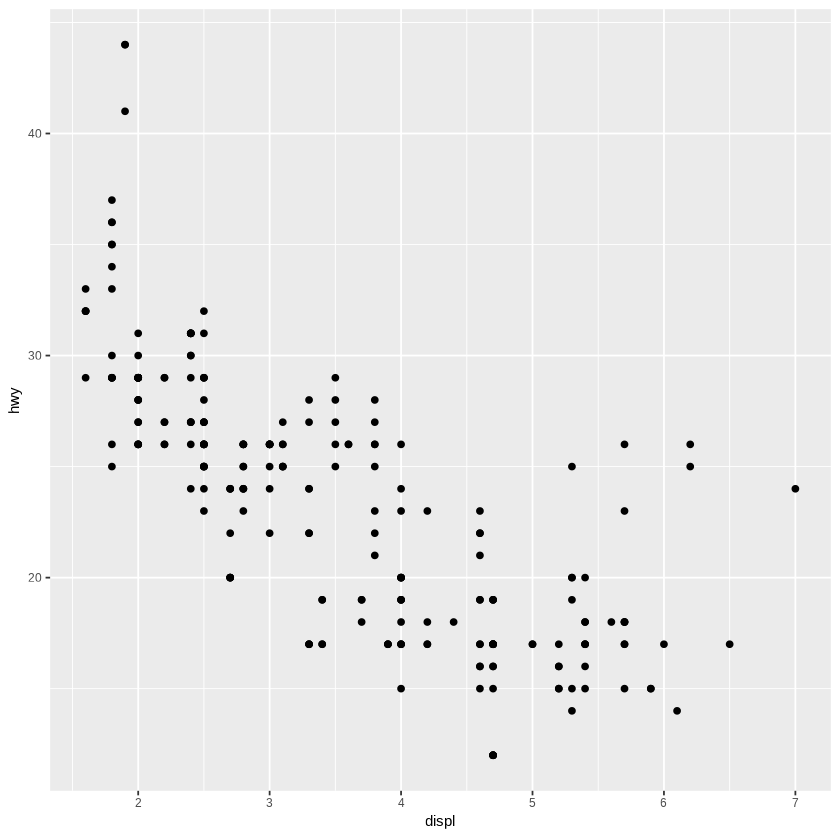

In [79]:
ggplot(mpg,aes(x=displ, y=hwy)) +
           geom_point()

- the produced scatter plot is defined by:
    1. <span style="color:blue">data = mpg</span> dataframe
    2. <span style="color:blue">aesthetics =</span> the x position is the engine
    3. <span style="color:blue">geom=</span> points
    
<span style="color:red">IMPORTANT</span>: data and aesthetics mapping are supplied in ggplot(), additional layers are added on with the '+' operator

- once a plot is created, it is possible to draw it using different rendering

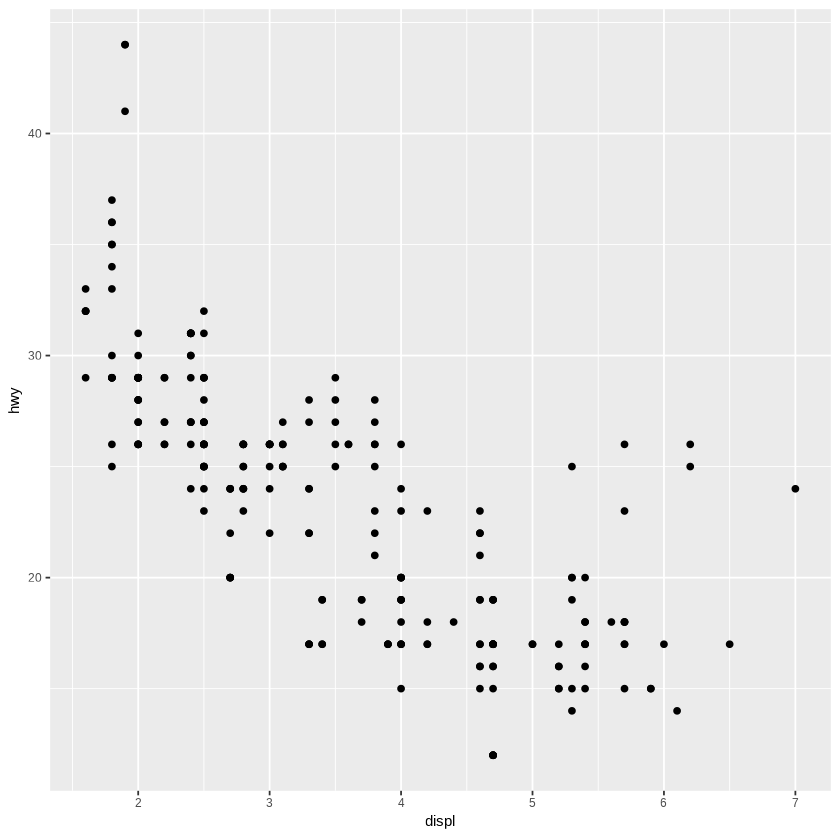

In [81]:
p1 <- ggplot(mpg,aes(displ,hwy))

#The plot of the previous example
p1 + geom_point()

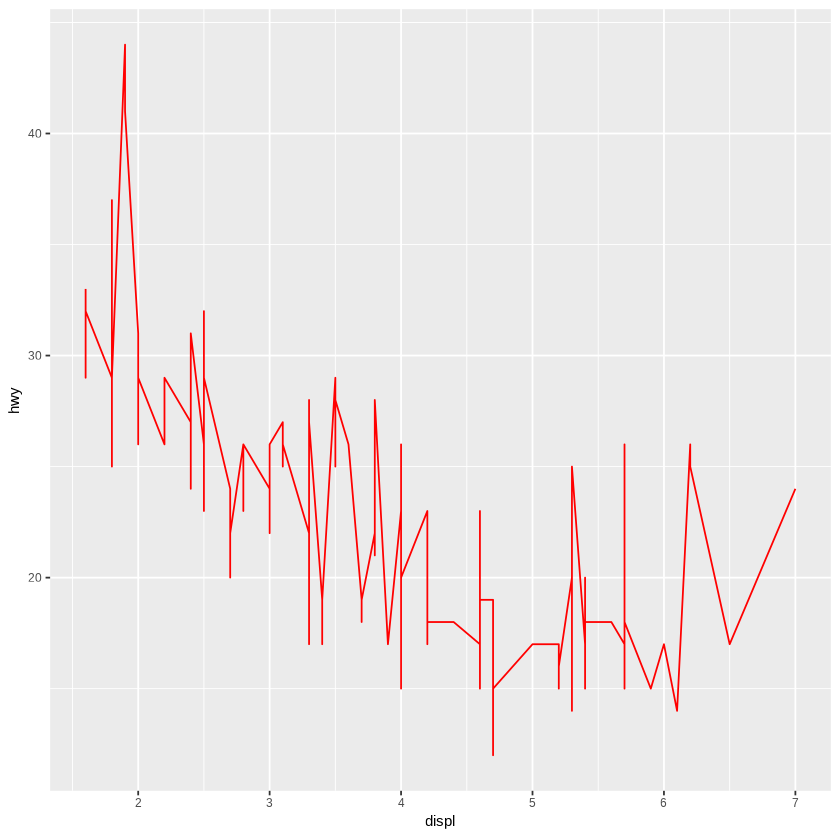

In [86]:
#New: points are connected with lines
p1 + geom_line(col="red")

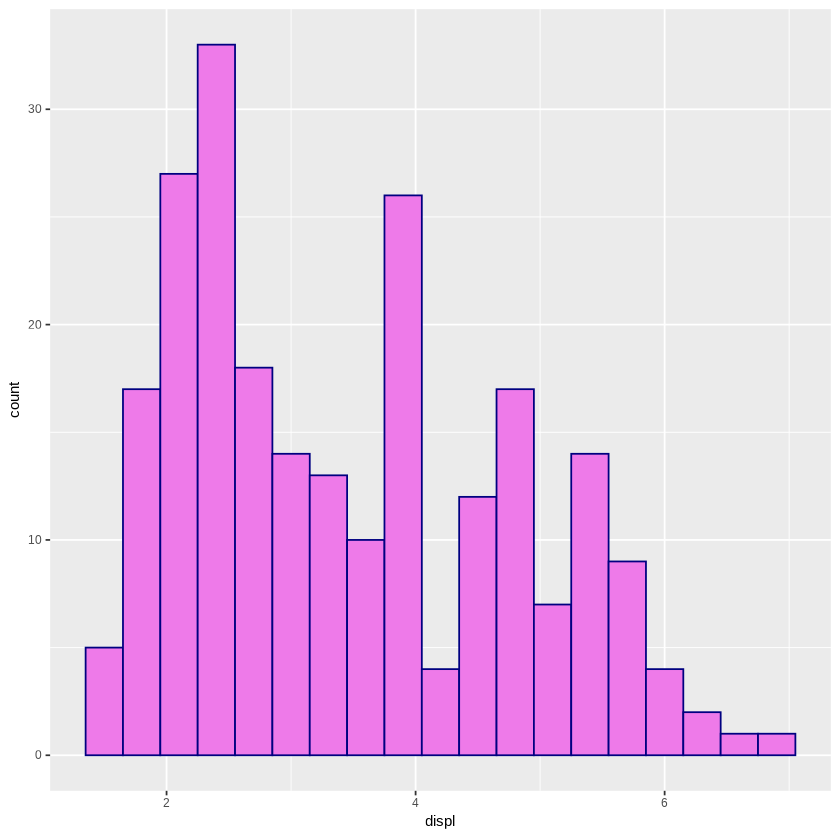

In [93]:
p2 <- ggplot(mpg,aes(displ))

p2 + geom_histogram(col="navy",
                   fill ="orchid2",
                   binwidth=0.3)

#### barchart example

- the <span style="color:blue">UCBAdmissions</span> data set contains data on applicants to graduate school at Berkeley for six largest departments in 1973 classified by admission ad sex
- we created separate barcharts for the variables: department, gender, and admitted or rejected 

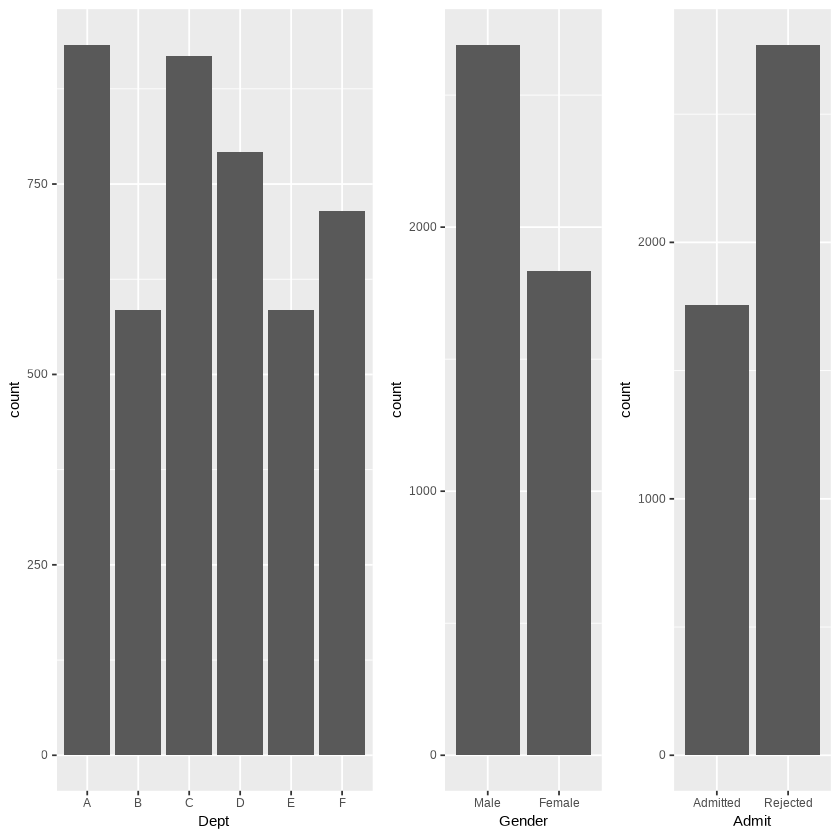

In [103]:
#install.packages("gridExtra")
library(gridExtra)

ucba <- as.data.frame(UCBAdmissions)

a <- ggplot(ucba, aes(Dept)) + geom_bar(aes(weight=Freq))
b <- ggplot(ucba, aes(Gender)) + geom_bar(aes(weight=Freq))
c <- ggplot(ucba, aes(Admit)) + geom_bar(aes(weight=Freq))

grid.arrange(a,b,c,nrow=1,widths=c(5,3,3))

## Dates and Time in R

### R date/time

### R date/time classes: POSIClt and POSIXct

### Reading date/times data from files

### strptime() function

### Dates and times arithmetic's

### The difftime() and as.difftime() functions

### Generating sequences of dates

### Regression using dates and times

#### 1

#### 2

### The lubridate package